# New or Old? Who are you :)))

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import zero_one_loss
%matplotlib inline

Please paste your news text in the cell below:

In [2]:
news='''在晚會中，蔡英文強調，團隊是來解決問題，國會將會成台灣改革的火車頭，但還缺了一小塊，就是區域立委，蔡適應就是最佳人選。

蔡英文說，蔡適應當選立委，可以當林右昌最佳推手，做整體改革的最佳幫手，讓把「艱困選區」選成「激戰選區」的超級戰將蔡適應，成為「台灣頭」的立法委員，為基隆拚建設，為台灣拚未來，把改革團隊的陣容「補好補滿」。'''

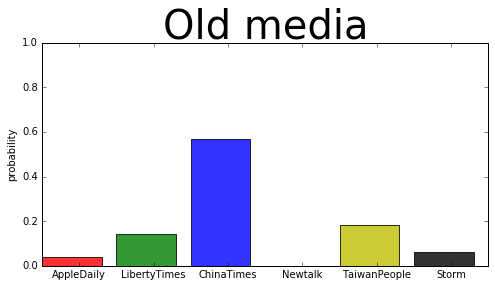

In [3]:
w = open('demo','w')
w.write(news)
w.close()
bashCommand = "Rscript demo_cut.R"
os.system(bashCommand)

data = np.loadtxt('out_matrix.txt',skiprows=1)
ans_six = np.loadtxt('ans.txt')
ans_binary = np.loadtxt('ans_binary.txt')
train_x = data[:6000] 
train_y_six = ans_six[:6000]
train_y_binary = ans_binary[:6000]
test_x = data[-2:]
# clf = svm.SVC(gamma=0.001, C=100.)
# clf.fit(train_x,train_y_binary)
# pre = clf.predict(test_x)
# if(pre[1]==1): t = "Old"
# else: t = "New"
os.system("src/libsvm/python/predict.py SPEECH out > out.txt")
ttt = open('out.txt')
t = ttt.read().splitlines()[8]
    
clf2 = RandomForestClassifier(n_estimators=300,n_jobs=2)
clf2.fit(train_x,train_y_six)
pre2 = clf2.predict_proba(test_x)
plt.figure(figsize=(8, 4), dpi=80)
index = np.arange(6)
bar_width = 0.5
plt.bar(range(6),pre2[1],color=('r','g','b','c','y','k'),alpha=0.8)
plt.title(t,fontsize = 40)
plt.ylabel('probability')
plt.ylim(0,1.)
plt.xticks(index + bar_width, ('AppleDaily', 'LibertyTimes', 'ChinaTimes', 'Newtalk', 'TaiwanPeople', 'Storm'))
plt.show()

Data modeling...